# Import Packages and Datasets

In [2]:
# Import packages
import scanpy as sc

# Import dataset
## ~ 33k Genes
normal = sc.read_h5ad('/Volumes/CHAMPANERI/Databases/Human_Nor_Kidney_CellHint_scRNA.h5ad')

# Preprocess Data and Quality Control

In [3]:
# Preprocessing of the Data

# Basic filtering
# Filter out cells that express fewer than 500 genes to remove low-quality cells, empty droplets, and debris.
sc.pp.filter_cells(normal, min_genes=500, inplace=True)
# Filter out genes that are detected in fewer than 3 cells to eliminate technical noise and very rarely expressed genes.
sc.pp.filter_genes(normal, min_cells=3, inplace=True)

'''
Annotate the group of mitochondrial genes as 'mt'
Calculate QC metrics for further filtering

# normal.var["mt"] = normal.var_names.str.startswith("MT-")
# sc.pp.calculate_qc_metrics(normal, qc_vars=["mt"], percent_top=None, log1p=False, inplace=True)

Violin plots of QC metrics -- give us information about how to proceed with filtering
Show NO mitochondrial genes and no cells with high total counts -- No further filtering
Uncomment to see the plots

# sc.pl.violin(normal, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)
# sc.pl.scatter(normal, x="total_counts", y="pct_counts_mt")
# sc.pl.scatter(normal, x="total_counts", y="n_genes_by_counts")
'''

# Normalize, log-transform, and scale the data
# Normalize the total gene expression in each cell to a target sum of 10,000 to correct for differences in sequencing depth.
sc.pp.normalize_total(normal, target_sum=1e4)
# Apply a natural logarithm transformation to the normalized data to stabilize variance and make expression values more comparable.
sc.pp.log1p(normal)

# Identify and plot highly-variable genes
# Identify highly-variable genes based on their mean expression and dispersion.
sc.pp.highly_variable_genes(normal, min_mean=0.0125, max_mean=3, min_disp=0.5)
# sc.pl.highly_variable_genes(normal)

# Store the raw data before further processing
normal.raw = normal.copy()

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


# Generate PCA and UMAP plus calculate Dendrogram Keys

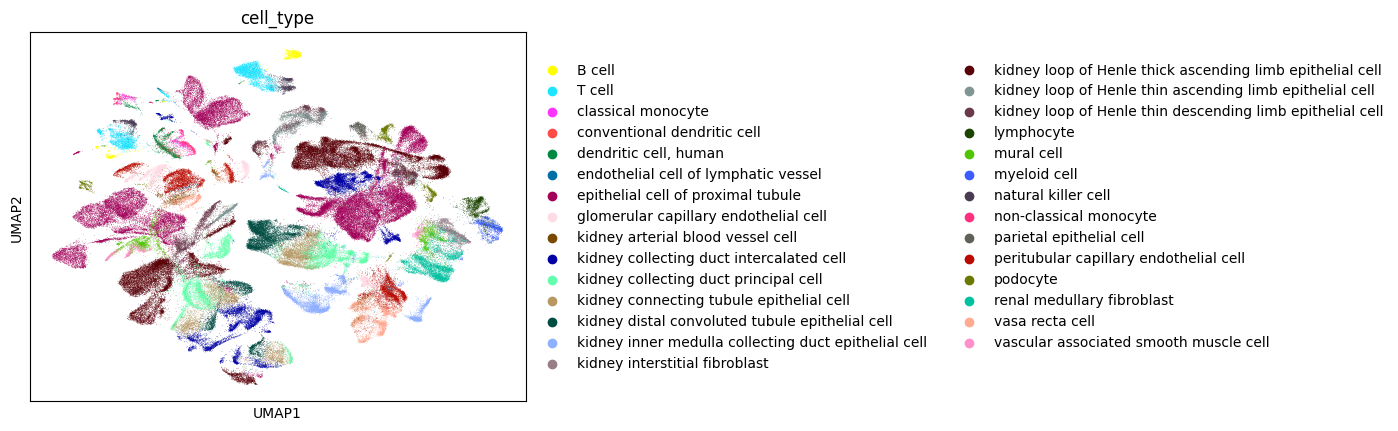

In [4]:
# Principal Component Analysis (PCA)
sc.pp.pca(normal, svd_solver="arpack")
# Plot the PCA -- Uncomment to see the plot
# sc.pl.pca(normal)
# sc.pl.pca_variance_ratio(normal, log=True)

# Generate UMAP
sc.pp.neighbors(normal)
sc.tl.umap(normal)

# Leiden clustering
sc.tl.leiden(normal, flavor='igraph', n_iterations=2)
sc.pl.umap(normal, color=['cell_type']) # Looks better with dark background

# Dendrogram Key for downstream visualization
sc.tl.dendrogram(normal, groupby='cell_type')
sc.tl.dendrogram(normal, groupby='tissue')

# Dictionaries

## Gene Dictionaries

In [5]:
# All Complement Genes
gene_dict = {
    'C1D': 'ENSG00000197223',
    'C1QA': 'ENSG00000173372',
    'C1QB': 'ENSG00000173369',
    'C1QC': 'ENSG00000159189',
    'C1QBP': 'ENSG00000108561',
    'C1R': 'ENSG00000159403',
    'C1RL': 'ENSG00000139178',
    'C1S': 'ENSG00000182326',
    'C2_ENSG00000166278': 'ENSG00000166278',
    'C3_ENSG00000125730': 'ENSG00000125730',
    'C3AR1': 'ENSG00000171860',
    'C4A': 'ENSG00000244731',
    'C4B': 'ENSG00000224389',
    'C4BPA': 'ENSG00000123838',
    'C4BPB': 'ENSG00000123843',
    'C5': 'ENSG00000106804',
    'C5AR1': 'ENSG00000197405',
    'C5AR2': 'ENSG00000134830',
    'C6_ENSG00000039537': 'ENSG00000039537',
    'C7_ENSG00000112936': 'ENSG00000112936',
    'C8A': 'ENSG00000157131',
    'C8B': 'ENSG00000021852',
    'C8G': 'ENSG00000176919',
    'C9_ENSG00000113600': 'ENSG00000113600',
    'CALR': 'ENSG00000179218',
    'CD46': 'ENSG00000117335',
    'CD55': 'ENSG00000196352',
    'CD59': 'ENSG00000085063',
    'CD93': 'ENSG00000125810',
    'CFB': 'ENSG00000243649',
    'CFD': 'ENSG00000197766',
    'CFH': 'ENSG00000000971',
    'CFHR1': 'ENSG00000244414',
    'CFHR2': 'ENSG00000080910',
    'CFHR3': 'ENSG00000116785',
    'CFHR4': 'ENSG00000134365',
    'CFHR5': 'ENSG00000134389',
    'CFI': 'ENSG00000205403',
    'CLU': 'ENSG00000120885',
    'COLEC10': 'ENSG00000184374',
    'COLEC11': 'ENSG00000118004',
    'CPB2': 'ENSG00000080618',
    'CPN1': 'ENSG00000120054',
    'CPN2': 'ENSG00000178772',
    'CSMD1': 'ENSG00000183117',
    'CFP': 'ENSG00000126759',
    'CR1': 'ENSG00000203710',
    'CR2': 'ENSG00000117322',
    'FCN1': 'ENSG00000085265',
    'FCN2': 'ENSG00000160339',
    'FCN3': 'ENSG00000142748',
    'ITGAM': 'ENSG00000169896',
    'ITGAMX': 'XXX',
    'ITGAX': 'ENSG00000140678',
    'ITGB2': 'ENSG00000160255',
    'MASP1': 'ENSG00000127241',
    'MASP2': 'ENSG00000009724',
    'MASP3': 'XXX',
    'MBL2': 'ENSG00000165471',
    'SERPING1': 'ENSG00000149131',
    'SUSD4': 'ENSG00000143502',
    'VSIG4': 'ENSG00000155659',
    'VCP': 'ENSG00000165280'
}



## Cell Type Dictionaries

In [39]:
# List all the cell types in the dataset
cell_types = normal.obs['cell_type'].unique()
print("Cell Types:")
for cell_type in cell_types:
    print(f"  {cell_type}")

# Define the groups for cell types
cell_type_groups = {
    'Myeloid Cells': ['myeloid cell', 'classical monocyte', 'non-classical monocyte'],
    'Kidney Cells': ['kidney distal convoluted tubule epithelial cell', 'epithelial cell of proximal tubule',
                     'kidney connecting tubule epithelial cell', 'kidney loop of Henle thick ascending limb epithelial cell',
                     'kidney collecting duct intercalated cell', 'kidney collecting duct principal cell',
                     'kidney inner medulla collecting duct epithelial cell', 'kidney loop of Henle thin descending limb epithelial cell',
                     'kidney loop of Henle thin ascending limb epithelial cell'],
    'Endothelial Cells': ['peritubular capillary endothelial cell', 'glomerular capillary endothelial cell',
                          'vasa recta cell', 'kidney arterial blood vessel cell', 'endothelial cell of lymphatic vessel'],
    'Fibroblasts': ['kidney interstitial fibroblast', 'renal medullary fibroblast'],
    'Epithelial Cells': ['podocyte', 'parietal epithelial cell'],
    'Immune Cells': ['lymphocyte', 'dendritic cell, human', 'conventional dendritic cell', 'natural killer cell', 'B cell', 'T cell'],
    'Smooth Muscle Cells': ['vascular associated smooth muscle cell', 'mural cell']
}

# Map cell types to groups
normal.obs['cell_type_group'] = 'Other'
for group, cell_types in cell_type_groups.items():
    normal.obs.loc[normal.obs['cell_type'].isin(cell_types), 'cell_type_group'] = group

# Check the new amount of cell types
cell_type_groups = normal.obs['cell_type_group'].unique()
print("Cell Type Groups:")
for group in cell_type_groups:
    print(f"  {group}")

Cell Types:
  kidney distal convoluted tubule epithelial cell
  epithelial cell of proximal tubule
  lymphocyte
  kidney connecting tubule epithelial cell
  kidney loop of Henle thick ascending limb epithelial cell
  kidney collecting duct intercalated cell
  peritubular capillary endothelial cell
  kidney interstitial fibroblast
  kidney collecting duct principal cell
  myeloid cell
  glomerular capillary endothelial cell
  podocyte
  vasa recta cell
  kidney arterial blood vessel cell
  kidney inner medulla collecting duct epithelial cell
  endothelial cell of lymphatic vessel
  parietal epithelial cell
  renal medullary fibroblast
  kidney loop of Henle thin descending limb epithelial cell
  mural cell
  vascular associated smooth muscle cell
  kidney loop of Henle thin ascending limb epithelial cell
  conventional dendritic cell
  dendritic cell, human
  natural killer cell
  B cell
  T cell
  classical monocyte
  non-classical monocyte
Cell Type Groups:
  Kidney Cells
  Immune Cel

# Plotting the Data

## Heatmaps

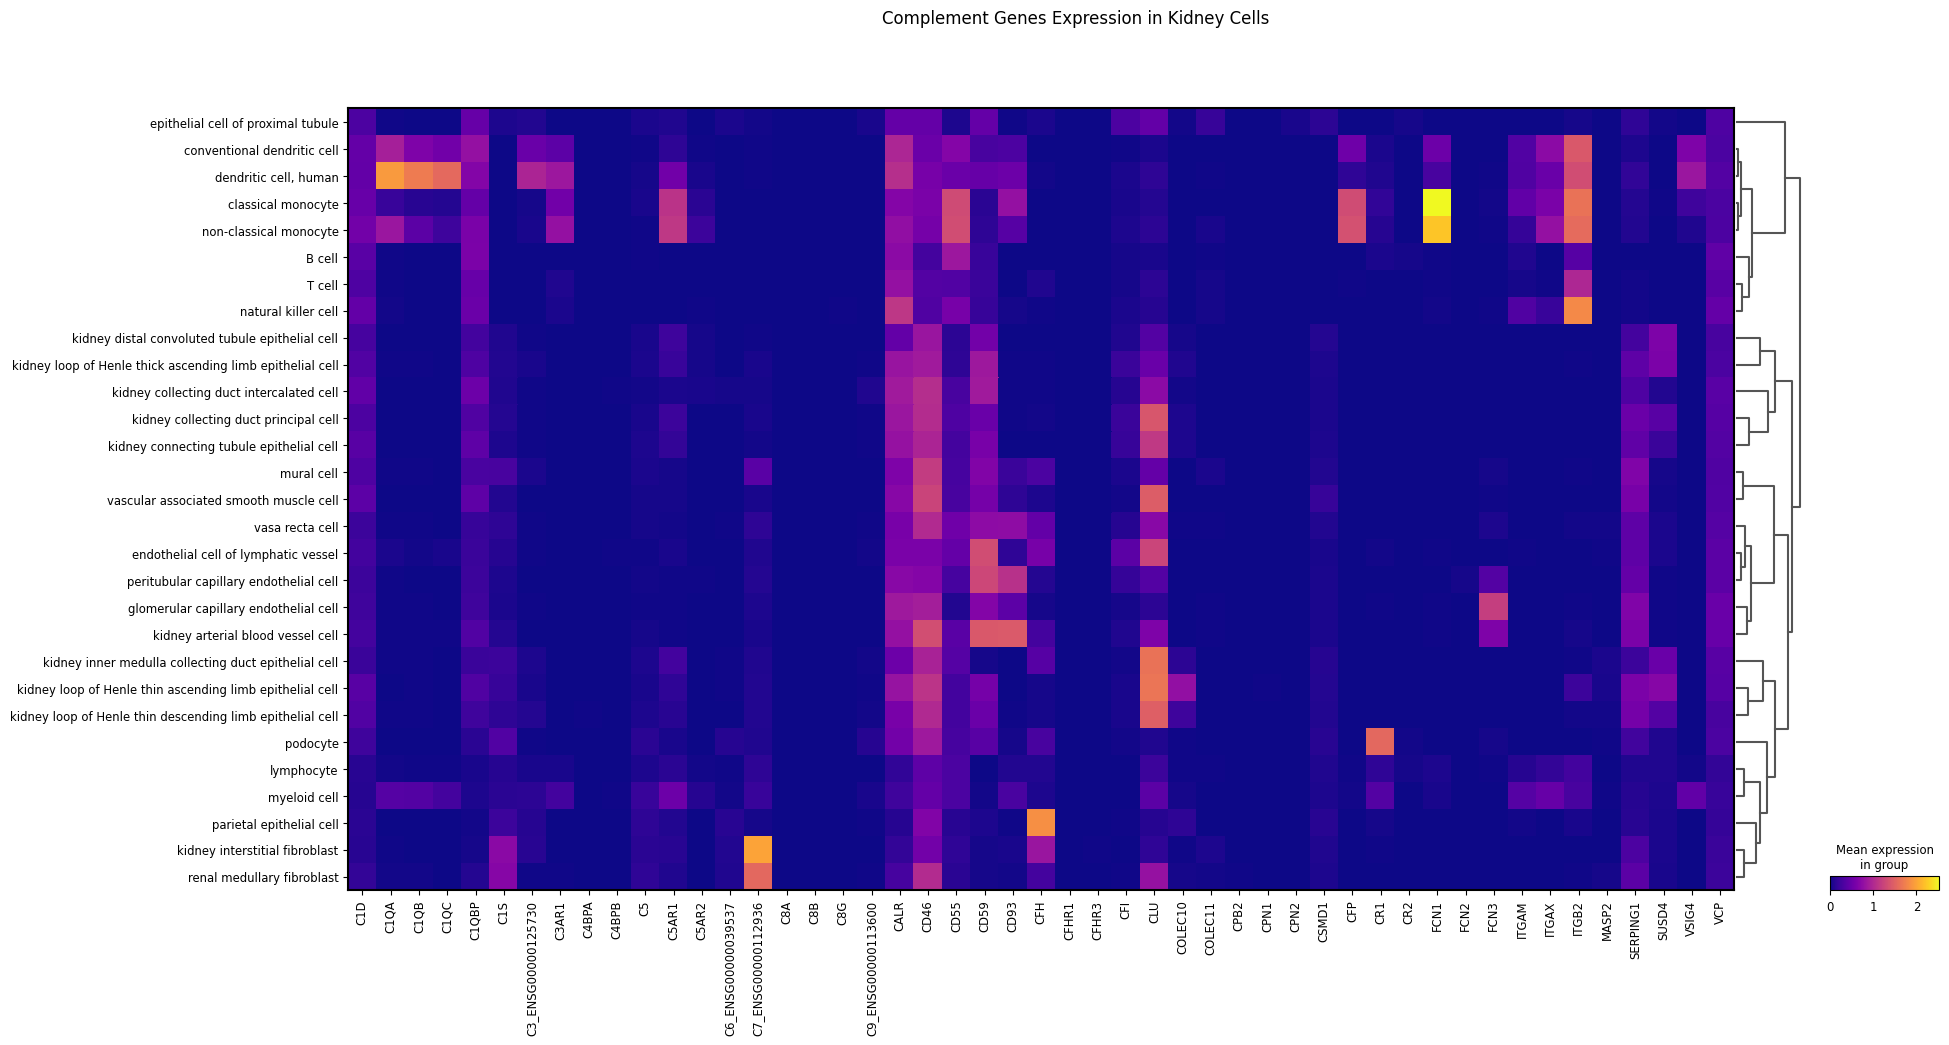

In [40]:
# Define the gene set for plotting
complement_genes = ['C1D', 'C1QA', 'C1QB', 'C1QC', 'C1QBP', 'C1S', 'C3_ENSG00000125730', 'C3AR1', 'C4BPA', 'C4BPB', 'C5', 'C5AR1', 'C5AR2', 'C6_ENSG00000039537', 'C7_ENSG00000112936', 'C8A', 'C8B', 'C8G', 'C9_ENSG00000113600', 'CALR', 'CD46', 'CD55', 'CD59', 'CD93', 'CFH', 'CFHR1', 'CFHR3', 'CFI', 'CLU', 'COLEC10', 'COLEC11', 'CPB2', 'CPN1', 'CPN2', 'CSMD1', 'CFP', 'CR1', 'CR2', 'FCN1', 'FCN2', 'FCN3', 'ITGAM', 'ITGAX', 'ITGB2', 'MASP2', 'SERPING1', 'SUSD4', 'VSIG4', 'VCP']
# Plot the expression of complement genes as a matrix plot
sc.pl.MatrixPlot(normal,
                 complement_genes,
                 groupby='cell_type',
                 gene_symbols='feature_name',
                 use_raw=False,
                 log=False,
                 # title='Complement Genes Expression in Kidney Cells',
                 ).add_dendrogram(show=True, size=0.9).style(cmap='plasma', edge_color='none').show()
# .savefig('heatmap_aG-aC_NKD.pdf')

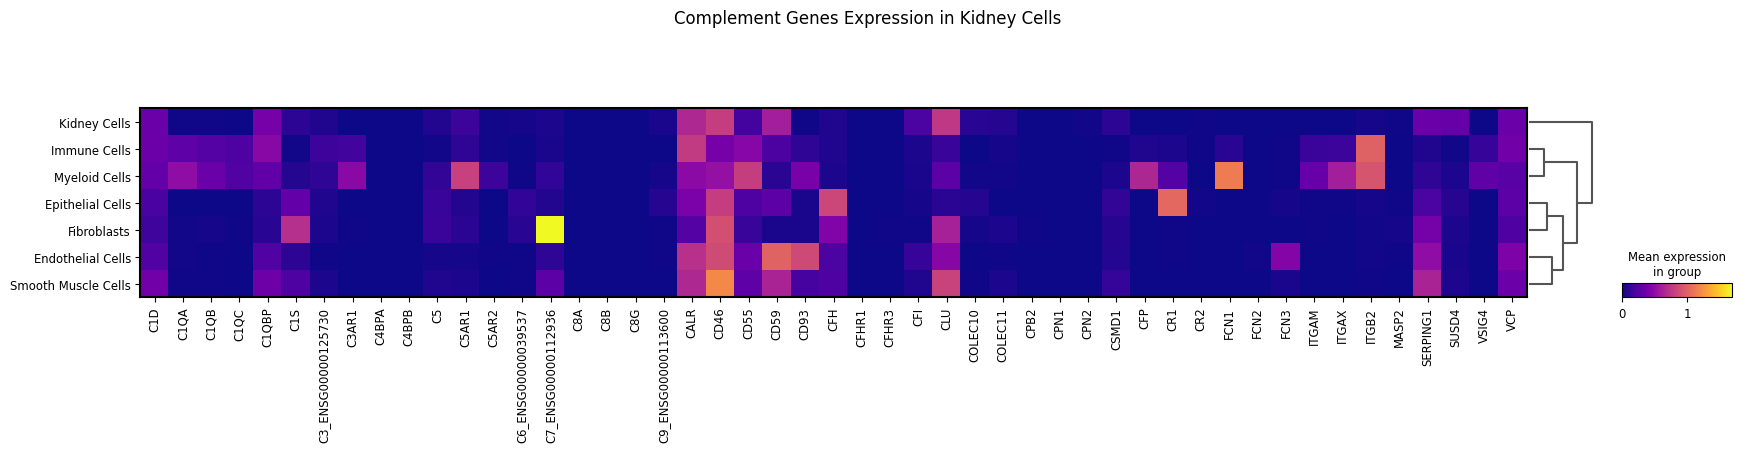

In [43]:
# Define the gene set for plotting
complement_genes = ['C1D', 'C1QA', 'C1QB', 'C1QC', 'C1QBP', 'C1S', 'C3_ENSG00000125730', 'C3AR1', 'C4BPA', 'C4BPB', 'C5', 'C5AR1', 'C5AR2', 'C6_ENSG00000039537', 'C7_ENSG00000112936', 'C8A', 'C8B', 'C8G', 'C9_ENSG00000113600', 'CALR', 'CD46', 'CD55', 'CD59', 'CD93', 'CFH', 'CFHR1', 'CFHR3', 'CFI', 'CLU', 'COLEC10', 'COLEC11', 'CPB2', 'CPN1', 'CPN2', 'CSMD1', 'CFP', 'CR1', 'CR2', 'FCN1', 'FCN2', 'FCN3', 'ITGAM', 'ITGAX', 'ITGB2', 'MASP2', 'SERPING1', 'SUSD4', 'VSIG4', 'VCP']
# Plot the expression of complement genes as a matrix plot only for cell_type_groups
(sc.pl.MatrixPlot(normal,
                 complement_genes,
                 groupby='cell_type_group',
                 gene_symbols='feature_name',
                 use_raw=False,
                 log=False,
                 # title='Complement Genes Expression in Kidney Cells',
                 ).add_dendrogram(show=True, size=0.9).style(cmap='plasma', edge_color='none').show
 # .savefig('heatmap_aG-sC_NKD.pdf')


In [ ]:
# Define the gene set for plotting
complement_genes = ['C1D', 'C1QA', 'C1QB', 'C1QC', 'C1QBP', 'C1S', 'C3_ENSG00000125730', 'C3AR1', 'C4BPA', 'C4BPB', 'C5', 'C5AR1', 'C5AR2', 'C6_ENSG00000039537', 'C7_ENSG00000112936', 'C8A', 'C8B', 'C8G', 'C9_ENSG00000113600', 'CALR', 'CD46', 'CD55', 'CD59', 'CD93', 'CFH', 'CFHR1', 'CFHR3', 'CFI', 'CLU', 'COLEC10', 'COLEC11', 'CPB2', 'CPN1', 'CPN2', 'CSMD1', 'CFP', 'CR1', 'CR2', 'FCN1', 'FCN2', 'FCN3', 'ITGAM', 'ITGAX', 'ITGB2', 'MASP2', 'SERPING1', 'SUSD4', 'VSIG4', 'VCP']
# Plot the expression of complement genes as a matrix plot only for cell_type_groups
(sc.pl.MatrixPlot(normal,
                 complement_genes,
                 groupby='cell_type_group',
                 gene_symbols='feature_name',
                 use_raw=False,
                 log=False,
                 # title='Complement Genes Expression in Kidney Cells',
                 ).add_dendrogram(show=True, size=0.9).style(cmap='plasma', edge_color='none').show
 # .savefig('heatmap_aG-sC_NKD.pdf')


## Dot Plots

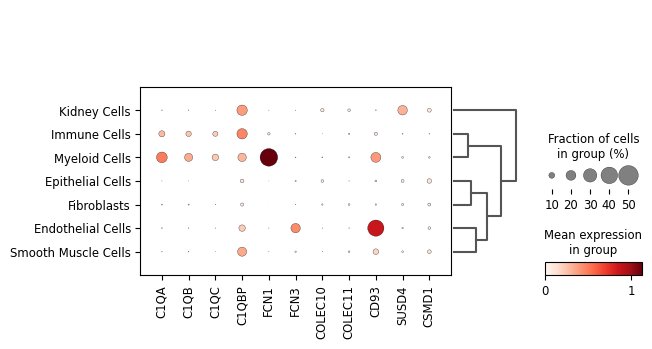

In [45]:
# Define the gene set for plotting
complement_prms = ['C1QA', 'C1QB', 'C1QC', 'C1QBP', 'FCN1', 'FCN3', 'COLEC10', 'COLEC11', 'CD93', 'SUSD4', 'CSMD1']

# Plot the expression of complement PRMs as a dot plot
sc.pl.DotPlot(normal, complement_prms, groupby='cell_type_group', gene_symbols='feature_name').add_dendrogram(show=True,size=0.9).show()